MA0218 Beat The Clock Exercises
===============================

**Author:** Hankertrix




# Table of Contents



Import all the needed libraries.



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Set the theme for seaborn
sb.set_theme()

The constants used in the program.



In [2]:
FOLDER_PATH: str = "./data/"
DATASET_E_FILE_PATH: str = os.path.join(FOLDER_PATH, "quizData_Set_E.csv")
DATASET_F_FILE_PATH: str = os.path.join(FOLDER_PATH, "quizData_Set_F.csv")

## Preparation 1



Load the data set.



In [3]:
dataset_e = pd.read_csv(DATASET_E_FILE_PATH)
print(dataset_e.head())

   FixedAcidity  VolatileAcidity  CitricAcid  pHindex
0          10.4             0.61        0.49     3.16
1          10.0             0.38        0.38     3.15
2           7.9             0.24        0.40     3.32
3           9.9             0.50        0.50     3.16
4          11.6             0.58        0.66     3.25


Print the statistical description of the data.



In [4]:
print(dataset_e.describe())

       FixedAcidity  VolatileAcidity   CitricAcid      pHindex
count   1000.000000      1000.000000  1000.000000  1000.000000
mean       8.326000         0.528665     0.272160     3.309680
std        1.756442         0.181278     0.194516     0.156725
min        4.600000         0.120000     0.000000     2.740000
25%        7.100000         0.390000     0.097500     3.200000
50%        7.900000         0.520000     0.250000     3.300000
75%        9.300000         0.640000     0.420000     3.400000
max       15.900000         1.330000     1.000000     4.010000


Plot the box plot of the variables.



<Axes: >

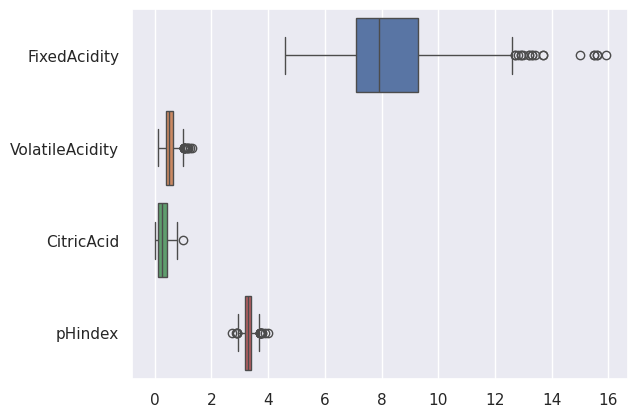

In [5]:
sb.boxplot(dataset_e, orient="h")

Plot the kernel density plot of the variables.



<Axes: ylabel='Density'>

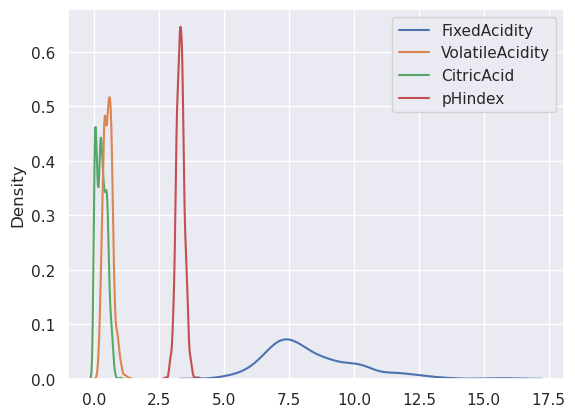

In [6]:
sb.kdeplot(dataset_e)

From the graphs above, it seems that `FixedAcidity` has the most "Normal" looking distribution.

Printing the skew of each variable.



In [7]:
print(dataset_e.skew())

FixedAcidity       0.994536
VolatileAcidity    0.562535
CitricAcid         0.324123
pHindex            0.189697
dtype: float64


From the skew data above, it seems that `FixedAcidity` has the most number of outliers compared to the rest of the variables.



## Preparation 2



Get the correlation matrix.



In [8]:
correlation_matrix = dataset_e.corr()
print(correlation_matrix)

                 FixedAcidity  VolatileAcidity  CitricAcid   pHindex
FixedAcidity         1.000000        -0.232366    0.663409 -0.673898
VolatileAcidity     -0.232366         1.000000   -0.539493  0.211425
CitricAcid           0.663409        -0.539493    1.000000 -0.549747
pHindex             -0.673898         0.211425   -0.549747  1.000000


Plot the correlation heatmap of the variables.



<Axes: >

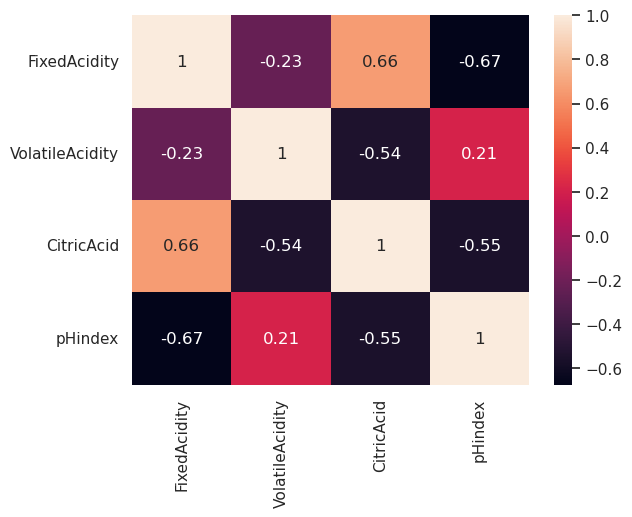

In [9]:
sb.heatmap(correlation_matrix, annot=True)

From the correlation matrix above, it seems that `FixedAcidity` has the highest absolute correlation with `pHindex` of `0.67`. Such a correlation is helpful in predicting `pHindex` as acidity directly affects the pH of a substance.



## Preparation 3



Pull out the variables that aren't `pHindex`.



In [10]:
other_variables = [variable for variable in dataset_e.columns if variable != "pHindex"]
print(other_variables)

['FixedAcidity', 'VolatileAcidity', 'CitricAcid']


Iterate over all the variables and plot the joint plots between them and `pHindex`.



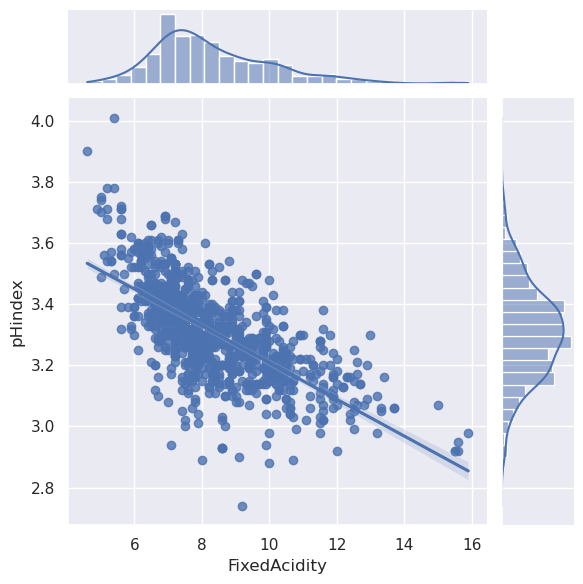

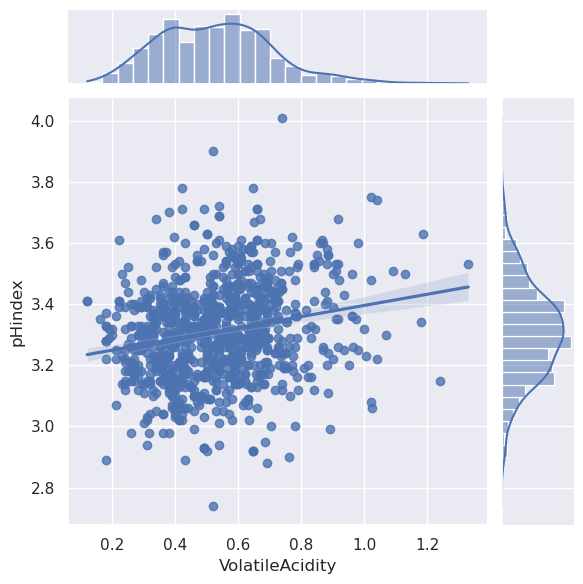

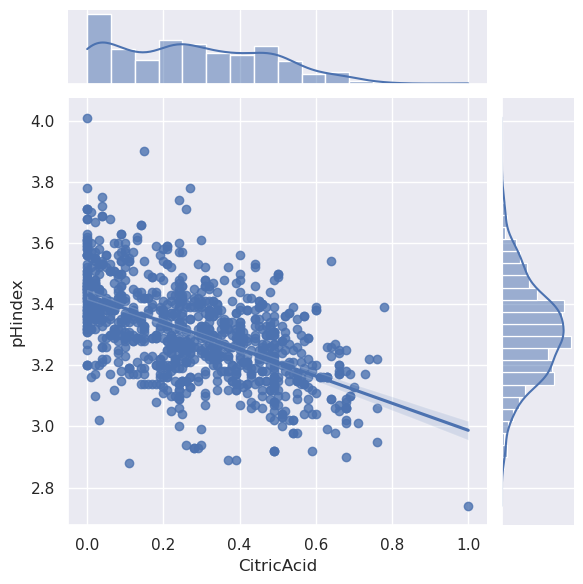

In [11]:
for variable in other_variables:
    sb.jointplot(
        y="pHindex",
        x=variable,
        data=dataset_e,

        # Add a linear regression line to the plot
        kind="reg"
    )

Plot the pair plot of all the variables against `pHindex`.



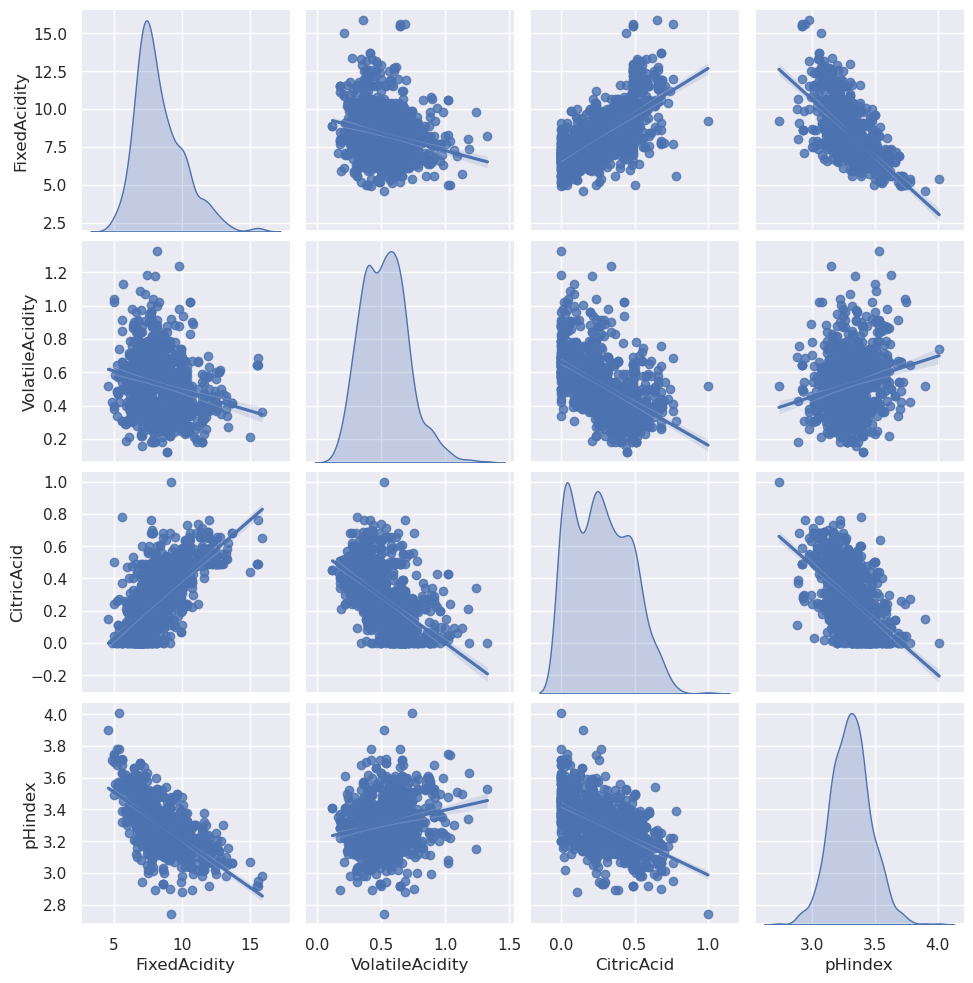

In [12]:
sb.pairplot(data=dataset_e, diag_kind="kde", kind="reg")

From the graphs above, it seems that `FixedAcidity` has the strongest linear relation with `pHindex`. It is useful in predicting `pHindex` as acidity is inversely proportional to pH.



## Preparation 4



Import the train test split function.



In [13]:
from sklearn.model_selection import train_test_split

Split the data into training and testing data sets, with 65% for training, and 35% for testing.



In [14]:
training_data, testing_data = train_test_split(dataset_e, test_size=0.35)
print(training_data[:10])
print()
print(testing_data[:10])

     FixedAcidity  VolatileAcidity  CitricAcid  pHindex
946           8.9            0.430        0.45     3.35
434           9.9            0.500        0.24     3.34
705          10.5            0.260        0.47     3.18
504          10.6            1.020        0.43     3.08
831           7.3            0.305        0.39     3.29
828           6.6            0.390        0.49     3.12
634           8.7            0.520        0.09     3.34
373           9.2            0.920        0.24     3.48
232           6.0            0.500        0.00     3.36
68            8.9            0.620        0.19     3.17

     FixedAcidity  VolatileAcidity  CitricAcid  pHindex
814           7.0            0.540        0.00     3.39
853           9.1            0.290        0.33     3.26
957           5.3            0.570        0.01     3.57
348           8.1            0.870        0.00     3.25
924           5.7            0.600        0.00     3.45
879          10.4            0.380        0.46 

Import the linear regression model.



In [15]:
from sklearn.linear_model import LinearRegression

Iterate over all the variables and fit a linear regression model for all the variables to predict `pHindex`.



-0.05951238017691248
0.15148260948991416
-0.40642653314987187


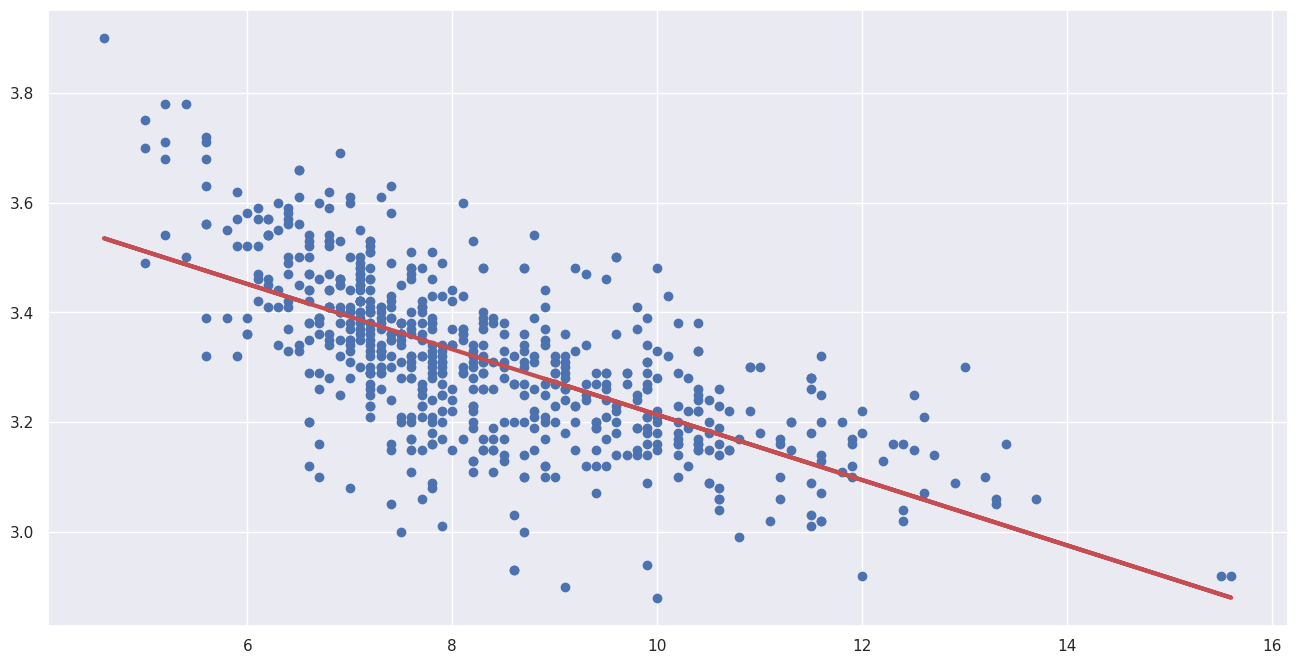

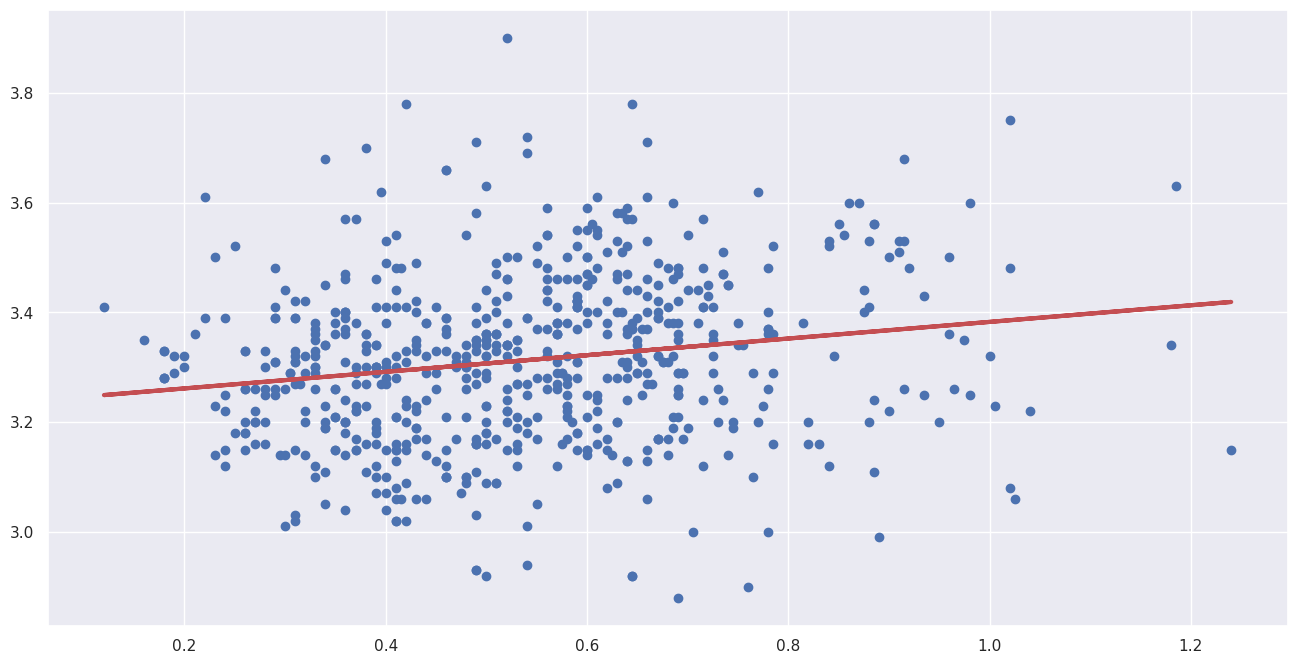

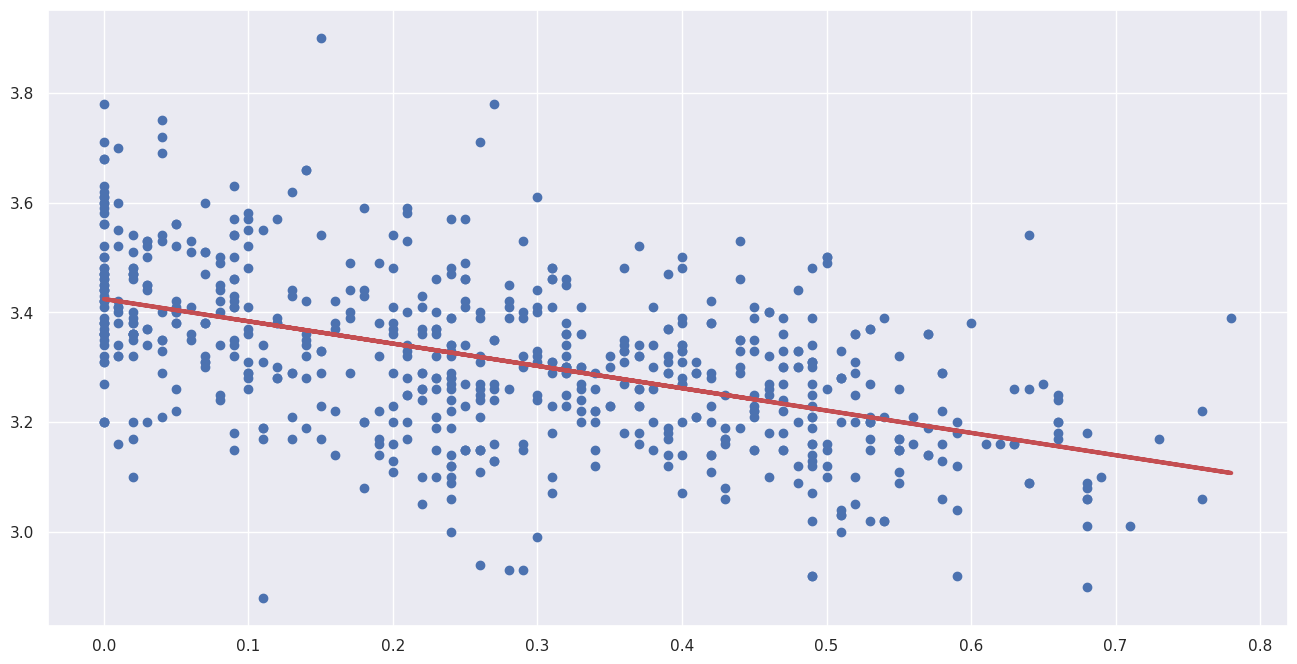

In [16]:
# Get the training data of the pHindex
ph_index_data = pd.DataFrame(training_data["pHindex"])

# Iterate over all the other variables
for variable in other_variables:

    # Create a linear regression model
    model = LinearRegression()

    # Get the training data of the variable
    variable_training_data = pd.DataFrame(training_data[variable])

    # Train the linear regression model
    # on the training data
    model.fit(variable_training_data, ph_index_data)

    # Pull out the model coefficient
    model_coefficient = model.coef_[0][0]

    # Print the coefficients of the fitted model
    print(model_coefficient)

    # Create the formula to plot the line
    linear_regression_x = training_data[variable]
    linear_regression_y = model_coefficient * linear_regression_x + model.intercept_

    # Plot the data on a scatter plot with the regression line
    _ = plt.figure(figsize=(16, 8))
    plt.scatter(y=ph_index_data, x=variable_training_data)
    plt.plot(linear_regression_x, linear_regression_y, "r-", linewidth=3)

## Preparation 5



Load the data set.



In [17]:
dataset_f = pd.read_csv(DATASET_F_FILE_PATH)
print(dataset_f.head())

   CitricAcid  Chlorides  Sulphates Alcohol
0        0.49      0.200       0.63     Low
1        0.38      0.169       0.65     Low
2        0.40      0.056       0.87     Low
3        0.50      0.205       0.75     Low
4        0.66      0.074       0.57     Low


Partition the data into 70% for training and 30% for testing.



In [18]:
training_data, testing_data = train_test_split(dataset_f, test_size=0.3)
print(training_data)
print(testing_data)

     CitricAcid  Chlorides  Sulphates Alcohol
615        0.01      0.088       0.56    High
666        0.02      0.077       0.62    High
973        0.00      0.087       0.63    High
525        0.33      0.061       0.90    High
750        0.14      0.038       0.65    High
..          ...        ...        ...     ...
745        0.40      0.062       0.70    High
949        0.00      0.080       0.61    High
834        0.00      0.079       0.54    High
466        0.30      0.065       0.82     Low
737        0.34      0.050       0.64    High

[700 rows x 4 columns]
     CitricAcid  Chlorides  Sulphates Alcohol
388        0.03      0.080       0.58     Low
359        0.02      0.070       0.58     Low
725        0.49      0.075       1.06    High
918        0.38      0.066       0.79    High
828        0.49      0.070       0.50    High
..          ...        ...        ...     ...
14         0.52      0.071       0.56     Low
358        0.21      0.081       0.66     Low
513       

Import the decision tree model.



In [19]:
from sklearn.tree import DecisionTreeClassifier

Get the 3 numeric variables.



In [20]:
numeric_variables = dataset_f.select_dtypes(include="number")
print(numeric_variables)

     CitricAcid  Chlorides  Sulphates
0          0.49      0.200       0.63
1          0.38      0.169       0.65
2          0.40      0.056       0.87
3          0.50      0.205       0.75
4          0.66      0.074       0.57
..          ...        ...        ...
995        0.11      0.048       0.88
996        0.01      0.048       0.75
997        0.00      0.050       0.79
998        0.00      0.048       0.74
999        0.65      0.096       0.84

[1000 rows x 3 columns]


Import the `metrics` module from `scikit-learn`.



In [21]:
import sklearn.metrics as metrics

Create the function to calculate the precision and recall scores.



In [22]:
def calculate_precision_and_recall(
    confusion_matrix,
) -> tuple[float, float]:
    """
    Function to calculate the precision,
    which is defined as tp / (tp + fp),
    where tp is the number of true positives,
    and fp is the number of false positives,
    and recall, which is defined as tp / (tp + fn),
    where fn is the number of false negatives.
    """

    # Pull out all the required data from the confusion matrix
    (
        true_negative_amount,
        false_positive_amount,
        false_negative_amount,
        true_positive_amount
    ) = confusion_matrix.ravel()

    # Get the precision score
    precision_score = true_positive_amount / (
        true_positive_amount + false_positive_amount
    )

    # Get the recall score
    recall_score = true_positive_amount / (
        true_positive_amount + false_negative_amount
    )

    # Return the precision and recall scores
    return (precision_score, recall_score)

Iterate over all the numeric variables and fit decision tree against them.



In [23]:
# Get the training data for alcohol
alcohol_training_data = pd.DataFrame(training_data["Alcohol"])

# Get the testing data for alcohol
alcohol_testing_data = pd.DataFrame(testing_data["Alcohol"])

# Iterate over all the numeric variables
for variable in numeric_variables:

    # Get the training data of the variable
    variable_training_data = pd.DataFrame(training_data[variable])

    # Get the testing data of the variable
    variable_testing_data = pd.DataFrame(testing_data[variable])

    # Create the decision tree model with a maximum depth of 2
    model = DecisionTreeClassifier(max_depth=2)

    # Fit the model using the training data
    model.fit(variable_training_data, alcohol_training_data)

    # Print the classification accuracy of the model
    # for the training data set
    print(f"Training accuracy: {model.score(variable_training_data, alcohol_training_data)}")

    # Predict a value using the training data
    training_prediction = model.predict(variable_training_data)

    # Get the confusion matrix
    training_confusion_matrix = metrics.confusion_matrix(
        alcohol_training_data,
        training_prediction
    )

    # Get the precision and recall scores
    training_precision, training_recall = calculate_precision_and_recall(
        training_confusion_matrix
    )

    # Print the precision and recall scores
    print(f"Training precision: {training_precision}")
    print(f"Training recall: {training_recall}")
    print()

    # Print the classification accuracy of the model
    # for the testing data set
    print(f"Testing accuracy: {model.score(variable_testing_data, alcohol_testing_data)}")

    # Predict a value using the testing data
    testing_prediction = model.predict(variable_testing_data)

    # Get the confusion matrix
    testing_confusion_matrix = metrics.confusion_matrix(
        alcohol_testing_data,
        testing_prediction
    )

    # Get the precision and recall scores
    testing_precision, testing_recall = calculate_precision_and_recall(
        testing_confusion_matrix
    )

    # Print the precision and recall scores
    print(f"Testing precision: {testing_precision}")
    print(f"Testing recall: {testing_recall}")
    print("\n\n\n")

Training accuracy: 0.6142857142857143
Training precision: 0.671957671957672
Training recall: 0.37910447761194027

Testing accuracy: 0.59
Testing precision: 0.64
Testing recall: 0.3333333333333333




Training accuracy: 0.6114285714285714
Training precision: 0.5580110497237569
Training recall: 0.9044776119402985

Testing accuracy: 0.59
Testing precision: 0.5439330543933054
Testing recall: 0.9027777777777778




Training accuracy: 0.6228571428571429
Training precision: 0.7232704402515723
Training recall: 0.34328358208955223

Testing accuracy: 0.5533333333333333
Testing precision: 0.578125
Testing recall: 0.2569444444444444




